### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Explore and Clean data

In [2]:
data= pd.read_csv('tmdb-movies.csv')
data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
data.shape

(10866, 21)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
data.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [6]:
data.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [7]:
data.vote_average.value_counts()

vote_average
6.1    496
6.0    495
5.8    486
5.9    473
6.2    464
      ... 
8.9      1
8.6      1
9.2      1
8.7      1
2.0      1
Name: count, Length: 72, dtype: int64

In [9]:
data.duplicated().sum()

np.int64(1)

In [11]:
# dropping unuseful columns
data.drop(['id', 'imdb_id', 'homepage', 'revenue_adj', 'budget_adj', 'tagline', 'cast', 'overview', 'keywords', 'production_companies', 'director', 'release_date'], axis = 1, inplace = True)

In [13]:
data.drop_duplicates(inplace = True)

In [15]:
data.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'runtime',
       'genres', 'vote_count', 'vote_average', 'release_year'],
      dtype='object')

In [17]:
data.isnull().sum()

popularity         0
budget             0
revenue            0
original_title     0
runtime            0
genres            23
vote_count         0
vote_average       0
release_year       0
dtype: int64

In [18]:
data.dropna(inplace = True)

In [20]:
# split values in the hyprid dataframe
data['genres'] = data['genres'].apply(lambda x: x.split("|")[0])
data.head()

,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,124,Action,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,119,Adventure,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,137,Action,2947,7.3,2015


In [21]:
# adding new column for movie profit (revenue - budget)
data['profit'] = data.revenue - data.budget
data.head()

,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action,5562,6.5,2015,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action,6185,7.1,2015,228436354
2,13.112507,110000000,295238201,Insurgent,119,Adventure,2480,6.3,2015,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action,5292,7.5,2015,1868178225
4,9.335014,190000000,1506249360,Furious 7,137,Action,2947,7.3,2015,1316249360


In [25]:
def catigorize_col (data, col, labels):
    # setting the edges to cut the column accordingly
    edges = [data[col].describe()['min'],
             data[col].describe()['25%'],
             data[col].describe()['50%'],
             data[col].describe()['75%'],
             data[col].describe()['max']]
    
    data[col] = pd.cut(data[col], edges, labels = labels, duplicates='drop')
    return data

In [26]:
# define labels for these edges
labels = ['not_popular', 'below_avg', 'average', 'popular']
catigorize_col(data, 'vote_average', labels)

data['vote_average'].unique()

['average', 'popular', 'below_avg', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [29]:
# dropping nans and confirming
data.dropna(inplace = True)

In [30]:
data['catprofit'] = data.revenue-data.budget

In [32]:
# define labels for these edges
labels = ['low', 'average', 'high']
catigorize_col(data, 'catprofit', labels)

KeyError: 'min'

In [33]:
data['catprofit'].unique()

['high', 'average', 'low', NaN]
Categories (3, object): ['low' < 'average' < 'high']

In [34]:
# dropping NaNs in profic column and confirming
data.dropna(inplace = True)

In [36]:
data.head()

,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year,profit,catprofit
0,32.985763,150000000,1513528810,Jurassic World,124,Action,5562,average,2015,1363528810,high
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action,6185,popular,2015,228436354,high
2,13.112507,110000000,295238201,Insurgent,119,Adventure,2480,average,2015,185238201,high
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action,5292,popular,2015,1868178225,high
4,9.335014,190000000,1506249360,Furious 7,137,Action,2947,popular,2015,1316249360,high


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10839 entries, 0 to 10864
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   popularity      10839 non-null  float64 
 1   budget          10839 non-null  int64   
 2   revenue         10839 non-null  int64   
 3   original_title  10839 non-null  object  
 4   runtime         10839 non-null  int64   
 5   genres          10839 non-null  object  
 6   vote_count      10839 non-null  int64   
 7   vote_average    10839 non-null  category
 8   release_year    10839 non-null  int64   
 9   profit          10839 non-null  int64   
 10  catprofit       10839 non-null  category
dtypes: category(2), float64(1), int64(6), object(2)
memory usage: 868.3+ KB


In [38]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
popularity,10839.0,6.476022e-01,1.001133e+00,6.500000e-05,0.208351,0.384557,7.154440e-01,3.298576e+01
budget,10839.0,1.462015e+07,3.069126e+07,0.000000e+00,0.000000,0.000000,1.500000e+07,3.800000e+08
revenue,10839.0,3.992141e+07,1.171326e+08,0.000000e+00,0.000000,0.000000,2.415277e+07,2.781506e+09
runtime,10839.0,1.021427e+02,3.129739e+01,0.000000e+00,90.000000,99.000000,1.110000e+02,9.000000e+02
vote_count,10839.0,2.178748e+02,5.762523e+02,1.000000e+01,17.000000,38.000000,1.460000e+02,9.767000e+03
release_year,10839.0,2.001317e+03,1.281051e+01,1.960000e+03,1995.000000,2006.000000,2.011000e+03,2.015000e+03
profit,10839.0,2.530125e+07,9.660716e+07,-1.657101e+08,0.000000,0.000000,9.212664e+06,2.544506e+09


### Visualization

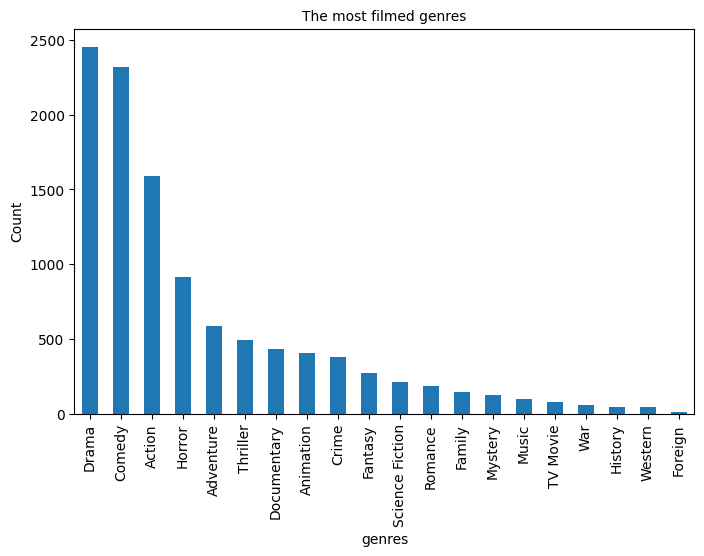

In [40]:
# visualising genres distribution
plt.figure(figsize=(8,5))
data['genres'].value_counts().plot(kind="bar")
plt.title("The most filmed genres", fontsize=(10))
plt.xlabel("genres", fontsize=10)
plt.ylabel("Count",fontsize=10)
plt.show()

In [41]:
data['genres'].describe()

count     10839
unique       20
top       Drama
freq       2453
Name: genres, dtype: object

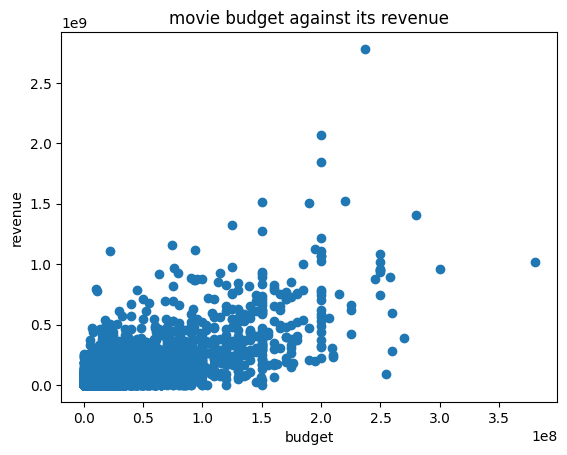

In [42]:
# plotting budget against revenue
plt.scatter(data['budget'],data['revenue']);
plt.title("movie budget against its revenue");
plt.xlabel('budget', fontsize=10);
plt.ylabel('revenue',fontsize=10);

In [43]:
data.to_csv('tmdb-movies-clean.csv')